# Import backage

In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

In [2]:
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from train import train
from models.models_new import Renorm_Dynamic
from dynamic_models_sis_new import Simple_Spring_Model
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from datetime import datetime
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [3]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7
dt = 0.01

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
spring = Simple_Spring_Model(device=device)
test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10, sigma=sigma, rou=rou,lam=1,miu=0.5,dt=dt) 
train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt)

# Train NIS

In [4]:
sz = 4
scale = 2
L = 1
mae2_w = 3
T_total = 30001
eis_nis, term1s_nis, term2s_nis, losses_nis, MAEs_mstep_nis, net_nis = train(train_data=train_data, test_data=test_data, 
                                                                    sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                    mae2_w=mae2_w, dt=dt, T2=T_total,framework='nis')

check point-------o_0-> 15:39:28.004342; lasting 0:00:02.614424 seconds
Epoch: 0
Train loss: 0.5320
dEI: 0.5823
term1: -0.2108
term2: 1.3755
Test multistep loss: 0.5802
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 15:39:33.136128; lasting 0:00:05.131786 seconds
check point-------o_0-> 15:39:39.325447; lasting 0:00:06.189319 seconds
Epoch: 500
Train loss: 0.0772
dEI: 1.6582
term1: 1.6337
term2: 1.6826
Test multistep loss: 0.0758
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 15:39:46.779387; lasting 0:00:07.453940 seconds
check point-------o_0-> 15:39:52.636830; lasting 0:00:05.857443 seconds
Epoch: 1000
Train loss: 0.0379
dEI: 2.0680
term1: 2.4721
term2: 1.6638
Test multistep loss: 0.0384
--------------------------------------------------------------------------------------------------------

# Train NIS+

In [5]:
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp, net_nisp = train(train_data=train_data, test_data=test_data, 
                                                                         sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                         mae2_w=mae2_w, dt=dt, T2=T_total,framework='nis+')

check point-------o_0-> 15:58:11.415024; lasting 0:00:00.048058 seconds
Epoch: 0
Train loss: 0.5016
dEI: 0.6823
term1: -0.0044
term2: 1.3690
Test multistep loss: 0.4765
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 15:58:16.446491; lasting 0:00:05.031467 seconds
check point-------o_0-> 15:58:31.746817; lasting 0:00:15.300326 seconds
Epoch: 500
Train loss: 0.0516
dEI: 1.8620
term1: 2.1098
term2: 1.6142
Test multistep loss: 0.0498
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 15:58:40.611395; lasting 0:00:08.864578 seconds
check point-------w_0-> 15:58:56.194692; lasting 0:00:15.583297 seconds
check point-------w_1-> 15:58:56.225334; lasting 0:00:00.030642 seconds
check point-------w_2-> 16:04:39.681965; lasting 0:05:43.456631 seconds
check point-------w_3-> 16:04:39.696092; lasting 0:00:00.01

# Results

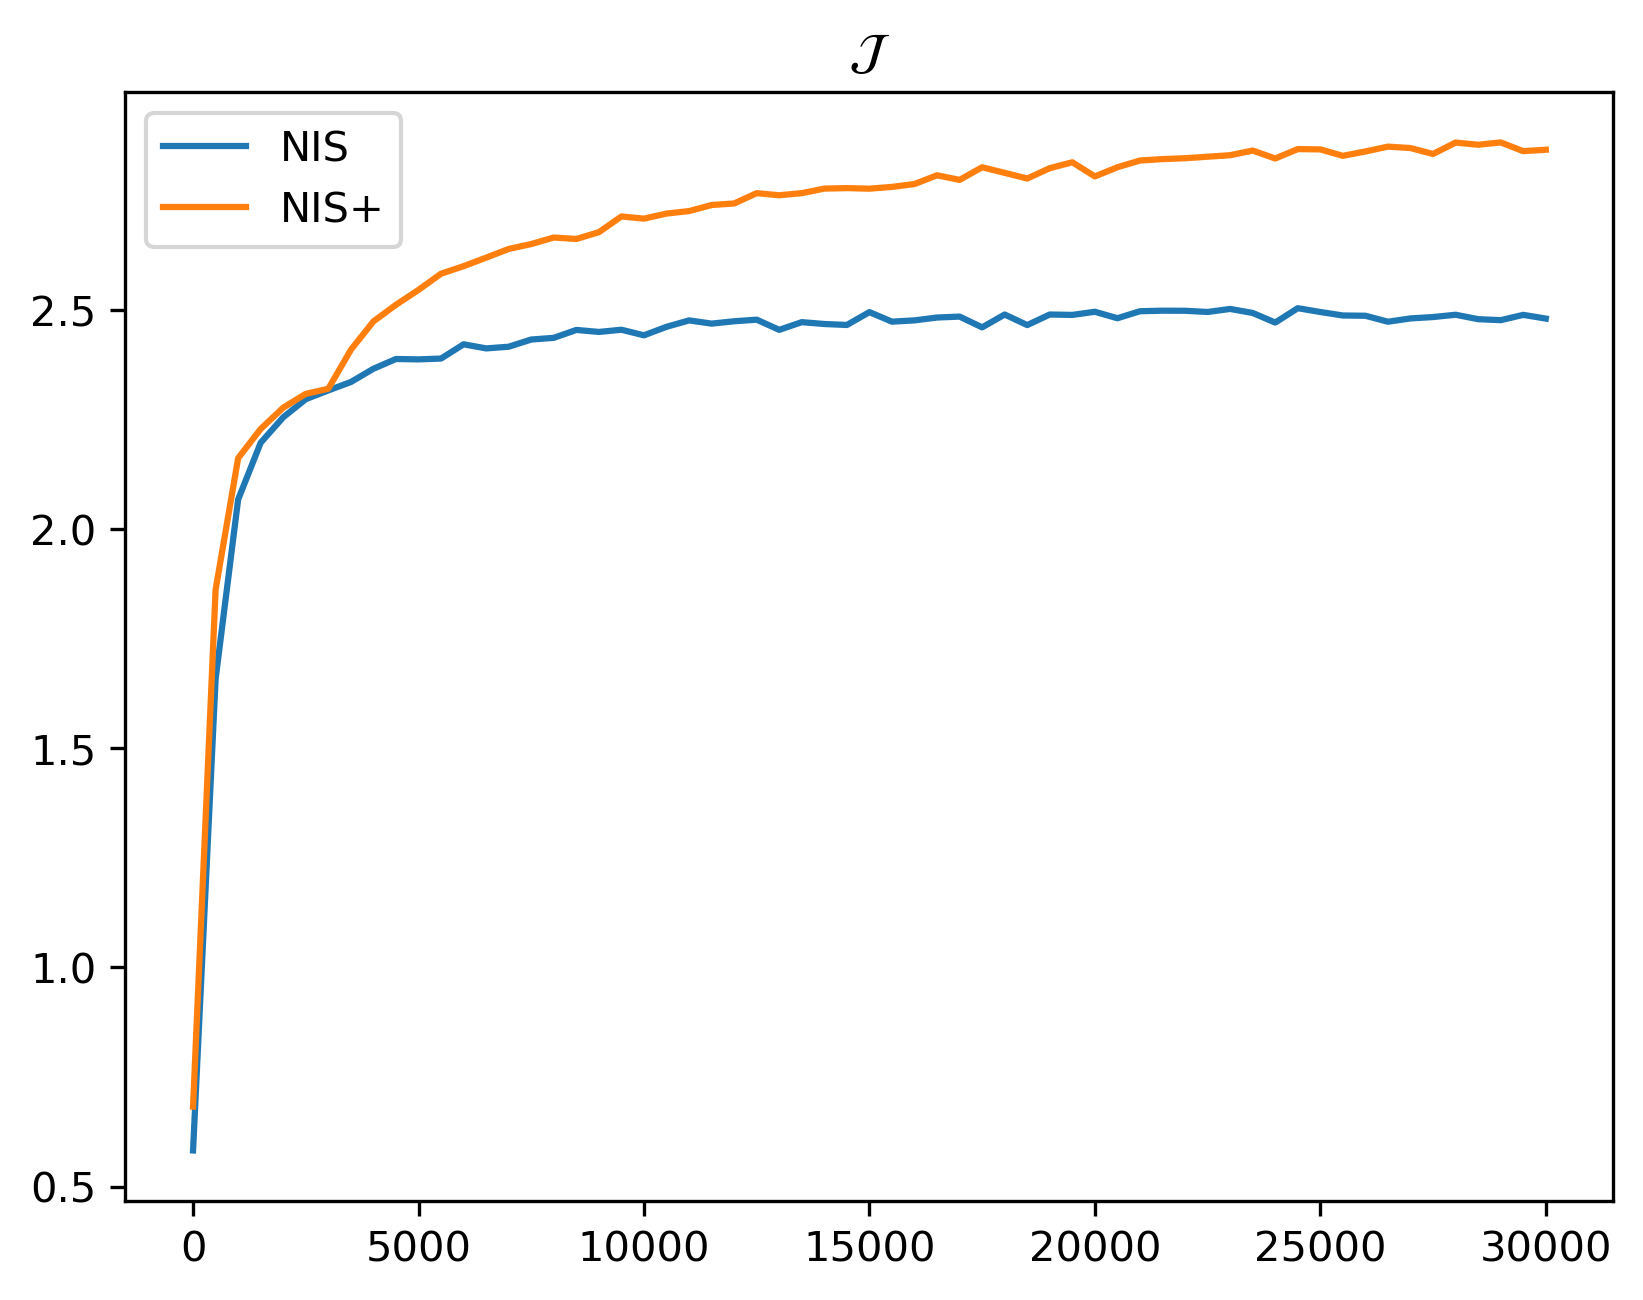

In [6]:
plt.figure(dpi=300)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, eis_nis, label='NIS')
plt.plot(timeseries, eis_nisp, label='NIS+')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()

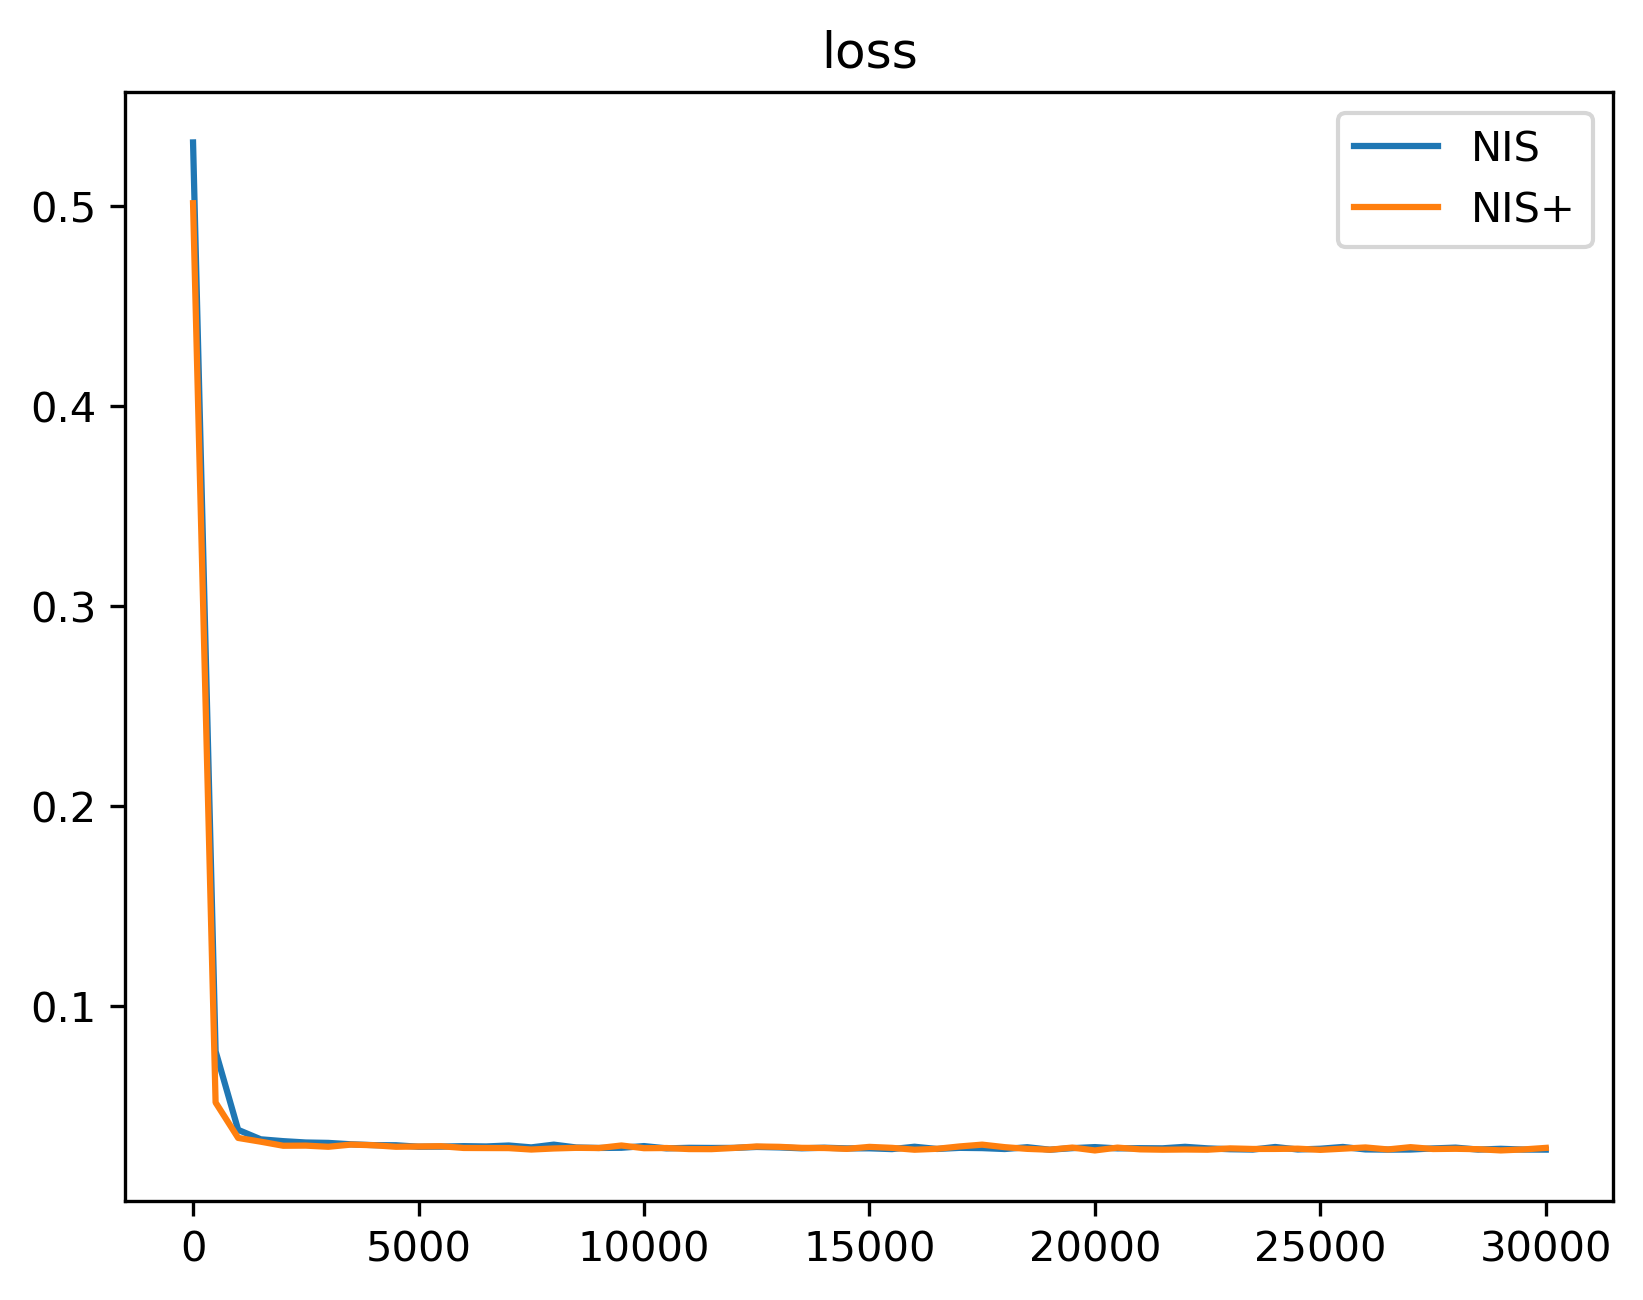

In [7]:
plt.figure(dpi=300)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, losses_nis, label='NIS')
plt.plot(timeseries, losses_nisp, label='NIS+')
plt.title(r'loss')
plt.legend()
#plt.yscale('log')
plt.show()

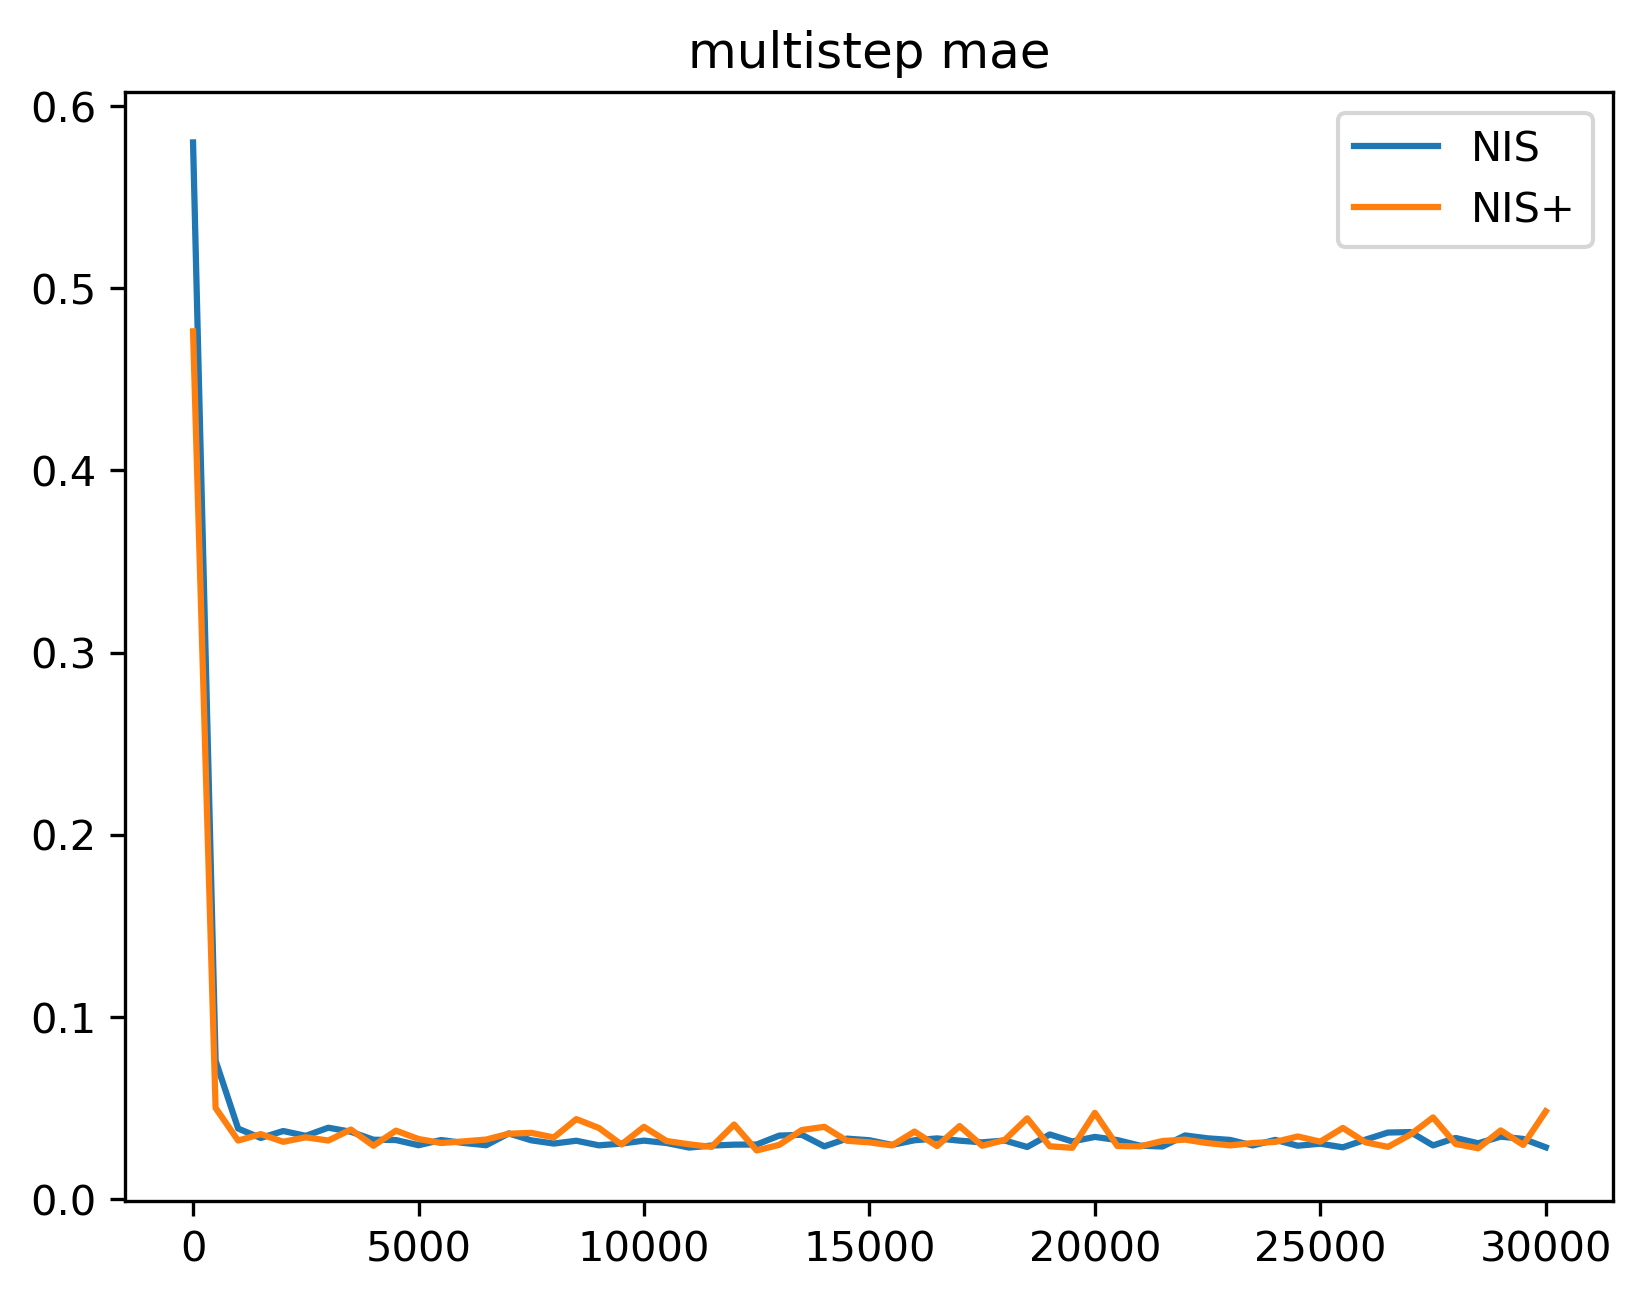

In [8]:
plt.figure(dpi=300)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, MAEs_mstep_nis, label='NIS')
plt.plot(timeseries, MAEs_mstep_nisp, label='NIS+')
plt.title(r'multistep mae')
plt.legend()
plt.show()